In [1]:
#imports
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict as Ord

#magic
%matplotlib inline

In [2]:
#import tab sep values file
df = pd.read_csv('All_WT_for_coopfit_tsv.csv', sep='\t')

In [3]:
#put saturation data column headers into list
colist = df.columns.tolist()[1:]

In [4]:
#create list of dataframes for each [lig]-sat data set for each receptor conc. and ensure sort oder (to avoid potting issues)
dflist = [df[['[egf]', i]].dropna().sort_values(by='[egf]') for i in colist]

In [5]:
#make headers uniform 
colist_low = [colist[i].lower() for i in range(len(colist))]

In [6]:
#apply uniform headers to dataframe
dflist_low = [dflist[i].rename(columns={colist[i]:colist_low[i]}) for i in range(len(colist_low))]

In [7]:
#import total receptor concentrations
with open('rtotswt.csv', 'r') as f:
    g = csv.reader(f)
    rtots = (list(g))

In [8]:
#convert to numerical values (floats)
rtots = [float(rtots[i][0]) for i in range(len(rtots))]

In [9]:
EGFR_WT_RTOTS_ord = Ord(zip(colist_low,rtots))

In [10]:
EGFR_WT_DICT_ord = Ord(zip(colist_low,dflist_low))

In [11]:
keylist = list(EGFR_WT_DICT_ord.keys())

In [12]:
keyed_sats = np.array([EGFR_WT_DICT_ord[key][key].as_matrix() for key in keylist])

In [13]:
keyed_ligs = np.array([EGFR_WT_DICT_ord[key]['[egf]'].as_matrix() for key in keylist])

In [14]:
keyed_rtots = np.array([EGFR_WT_RTOTS_ord[key] for key in keylist])

In [23]:
def init_nanarr(shape):
    nanarr = np.empty(shape)
    nanarr[:] = np.NAN
    return nanarr

def aligner(arr1, arr2):
    if arr1.shape > arr2.shape:
        arr_long = arr1
        arr_short = arr2
        aligned_arr = init_nanarr(arr1.shape)
    else:
        arr_long = arr2
        arr_short = arr1
        aligned_arr = init_nanarr(arr2.shape)
        
    indices = []
    
    for i in range(arr_short.shape[0]):
        x = np.abs(arr_long - arr_short[i])
        indices.append(np.argmin(x))
        
    for i in range(len(indices)):
        aligned_arr[indices[i]] = arr_short[i]
        
    return np.array([arr_long,aligned_arr])

In [25]:
a = aligner(keyed_ligs[0],keyed_ligs[1])

In [29]:
b = np.array([[1,2,3],[4,5,6]])

In [32]:
np.average(b,axis=0)

array([ 2.5,  3.5,  4.5])

In [35]:
np.nanmean(a,axis=0)

array([  8.20226750e-03,   1.56589350e-02,   3.15939650e-02,
         6.34974050e-02,   9.65206400e-02,   1.46741450e-01,
         2.48641100e-01,   3.96246600e-01,   6.90382750e-01,
         1.07939900e+00,   1.83936900e+00,   2.59434700e+00,
         4.63257200e+00,   8.15905350e+00,   1.60132400e+01])

In [39]:
d = np.average(b,axis=0)

In [40]:
e =np.array([[1,2,3],[4,5,6],[7,8,9]])

In [41]:
np.average(e,axis=0)

array([ 4.,  5.,  6.])

In [42]:
g = np.array([d,[7,8,9]])

In [43]:
g

array([[ 2.5,  3.5,  4.5],
       [ 7. ,  8. ,  9. ]])

In [44]:
np.average(g,axis=0)

array([ 4.75,  5.75,  6.75])

In [53]:
sub = keyed_ligs[0:3]

In [54]:
sub

array([ array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01]),
       array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,  1.831155  ,
        2.570049  ,  5.068029  ,  8.196809  ]),
       array([  1.04782800e-02,   4.39510000e-02,   6.71754600e-02,
         1.59764000e-01,   2.75784200e-01,   4.67317900e-01,
         8.37884700e-01,   1.34129100e+00,   2.29507100e+00,
         3.22207200e+00,   5.06843800e+00,   9.99232400e+00,
         1.63226300e+01])], dtype=object)

In [55]:
for i in sub:
    print(i.size)

15
13
13


In [58]:
def init_nanarr(shape):
    nanarr = np.empty(shape)
    nanarr[:] = np.NAN
    return nanarr

def aligner_mod2(arr_long,arr_short,aligned_arr):
    indices = [] 
    for i in range(arr_short.shape[0]):
        x = np.abs(arr_long - arr_short[i])
        indices.append(np.argmin(x))
        
    for i in range(len(indices)):
        aligned_arr[indices[i]] = arr_short[i]
        
    return aligned_arr
    

def aligner_wrap(arr1, arr2):
    if arr1.shape > arr2.shape:
        arr_long = arr1
        arr_short = arr2
        aligned_arr = init_nanarr(arr1.shape)
        return aligner_mod2(arr_long,arr_short,aligned_arr)
    elif arr1.shape < arr2.shape:
        arr_long = arr2
        arr_short = arr1
        aligned_arr = init_nanarr(arr2.shape)
        return aligner_mod2(arr_long,arr_short,aligned_arr)
    else:
        return arr2   

In [59]:
aligner_mod(keyed_ligs[0],keyed_ligs[1])

array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,         nan,
        1.831155  ,  2.570049  ,  5.068029  ,  8.196809  ,         nan])

In [132]:
def align_datset(datset):
    '''takes a numpy array of numpy arrays and aligns all arrays to to the first
    largest array it finds in the super array'''
    lng_idx = np.argmax([i.size for i in datset]) #index for first-found longest array
    
    oth_idxs = list(range(len([i.size for i in sub]))) #list of indices
    oth_idxs.remove(lng_idx) #remove index for long array
    
    #print(lng_idx,oth_idxs) PASSED
    
    return np.array([aligner_mod(datset[lng_idx],datset[i]) for i in oth_idxs])
    
    
    

In [61]:
a = [1,2,3,4]

In [62]:
max(a)

4

In [64]:
max([i.size for i in keyed_ligs])

15

In [70]:
np.argmax([i.size for i in keyed_ligs])

0

In [71]:
sub = keyed_ligs[1:]

In [72]:
np.argmax([i.size for i in sub])

4

In [120]:
a = (list(range(len([i.size for i in sub]))))

In [111]:
type(a)

list

In [112]:
type(a)

list

In [113]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [114]:
a.remove(4)

In [106]:
a

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [118]:
a = [i for i in range(sub.size)].

In [119]:
a

In [121]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [124]:
a.remove(4)

ValueError: list.remove(x): x not in list

In [125]:
a

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [131]:
align_datset(sub)

[array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
         0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,         nan,
         1.831155  ,  2.570049  ,  5.068029  ,  8.196809  ,         nan]),
 array([  1.04782800e-02,              nan,   4.39510000e-02,
          6.71754600e-02,              nan,   1.59764000e-01,
          2.75784200e-01,   4.67317900e-01,   8.37884700e-01,
          1.34129100e+00,              nan,   3.22207200e+00,
          5.06843800e+00,   9.99232400e+00,   1.63226300e+01]),
 array([         nan,   0.02105896,   0.04394744,   0.06716596,
                 nan,   0.142679  ,   0.237226  ,   0.4670442 ,
                 nan,   1.080119  ,   1.830193  ,   2.595465  ,
          4.079464  ,   8.197306  ,  16.17389   ]),
 array([        nan,         nan,  0.02985244,  0.06170198,  0.09792828,
         0.142702  ,  0.244107  ,  0.3909656 ,  0.7009451 ,  1.090977  ,
         1.849451  ,  2.621134  ,  5.115771  ,  8.046807  ,         nan]),
 a

In [133]:
a = align_datset(keyed_ligs)

In [134]:
a

array([[  8.43507800e-03,   1.63246100e-02,   3.21927400e-02,
          6.58995300e-02,   9.78926700e-02,   1.49518100e-01,
          2.53313200e-01,   3.97988100e-01,   6.93842500e-01,
                     nan,   1.83115500e+00,   2.57004900e+00,
          5.06802900e+00,   8.19680900e+00,              nan],
       [  1.04782800e-02,              nan,   4.39510000e-02,
          6.71754600e-02,              nan,   1.59764000e-01,
          2.75784200e-01,   4.67317900e-01,   8.37884700e-01,
          1.34129100e+00,              nan,   3.22207200e+00,
          5.06843800e+00,   9.99232400e+00,   1.63226300e+01],
       [             nan,   2.10589600e-02,   4.39474400e-02,
          6.71659600e-02,              nan,   1.42679000e-01,
          2.37226000e-01,   4.67044200e-01,              nan,
          1.08011900e+00,   1.83019300e+00,   2.59546500e+00,
          4.07946400e+00,   8.19730600e+00,   1.61738900e+01],
       [             nan,              nan,   2.98524400e-02,
     

In [138]:
avglig = np.nanmean(a, axis=0)

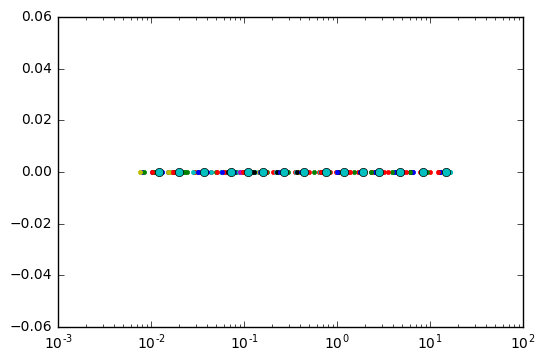

In [155]:
for i in range(keyed_ligs.size):
    plt.semilogx(keyed_ligs[i],0*keyed_ligs[i],'.')
plt.semilogx(avglig,0*avglig,'o')

In [153]:
stdlig = np.sqrt(np.nanvar(a, axis=0))

In [154]:
stdlig/avglig

array([ 0.22572979,  0.30261185,  0.29745345,  0.20514735,  0.18902502,
        0.22615111,  0.20642562,  0.24072554,  0.18473577,  0.24382811,
        0.15860793,  0.20818187,  0.1565952 ,  0.05987735,  0.10139037])

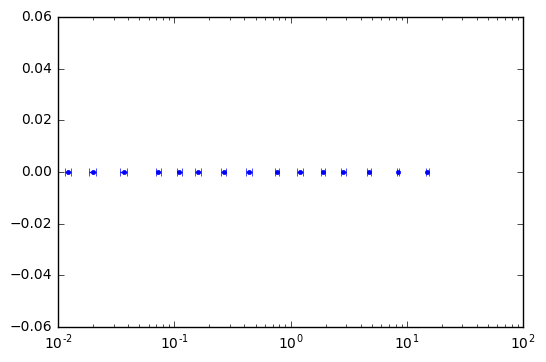

In [170]:
plt.errorbar(avglig, avglig*0,marker='.', linestyle='none', xerr=stderr)
plt.xscale('log')


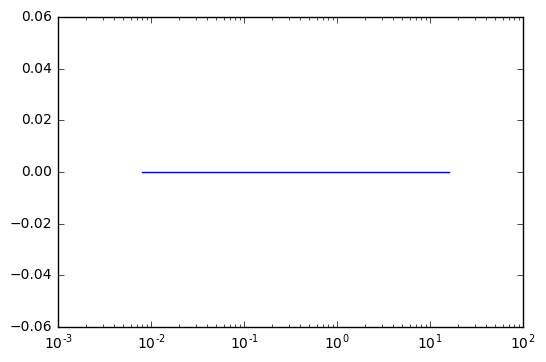

In [159]:
plt.semilogx(keyed_ligs[0],keyed_ligs[0]*0)

In [160]:
keyed_ligs.size

17

In [163]:
stderr = stdlig/np.sqrt(17)

In [171]:
a = np.array([1,4,np.nan,6,np.nan])

In [172]:
a

array([  1.,   4.,  nan,   6.,  nan])

In [178]:
b = np.where(a[:]==np.nan)

In [179]:
b

(array([], dtype=int64),)

In [184]:
np.where(not(np.isnan(a)))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [189]:
b = np.where(np.isnan(a)==False)

In [191]:
a[b]

array([ 1.,  4.,  6.])

In [192]:
a = align_datset(keyed_ligs)

In [198]:
b = np.where(np.isnan(a)==False)

In [199]:
[np.where(np.isnan(i)==False) for i in a]
    

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13]),),
 (array([ 0,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14]),),
 (array([ 1,  2,  3,  5,  6,  7,  9, 10, 11, 12, 13, 14]),),
 (array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 0,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 0,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14]),),
 (array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12, 13, 14]),),
 (array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 13, 14]),),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14]),),
 (array([ 0,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 14]),)]

In [201]:
for i in keyed_ligs:
    print(i.size)

15
13
13
13
12
15
14
15
15
14
14
15
13
14
15
14
15


In [203]:
a.shape

(15, 15)

In [204]:
keyed_ligs.shape

(17,)

In [237]:
def align_datset_mod(datset):
    '''takes a numpy array of numpy arrays and aligns all arrays to to the first
    largest array it finds in the super array'''
    lng_idx = np.argmax([i.size for i in datset]) #index for first-found longest array
    
    oth_idxs = list(range(len([i.size for i in datset]))) #list of indices
    oth_idxs.remove(lng_idx) #remove index for long array
    
    #print(lng_idx,oth_idxs) PASSED
    
    container = [aligner_mod(datset[lng_idx],datset[i]) for i in oth_idxs]
    container.insert(0,datset[lng_idx])
    
    return np.array(container)

In [209]:
a = [i.size for i in keyed_ligs]

In [214]:
a

[15, 13, 13, 13, 12, 15, 14, 15, 15, 14, 14, 15, 13, 14, 15, 14, 15]

In [213]:
lng_idx = np.argmax([i.size for i in keyed_ligs])

In [215]:
lng_idx

0

In [220]:
oth_idxs = list(range(len([i.size for i in keyed_ligs])))

In [221]:
oth_idxs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [222]:
 oth_idxs.remove(lng_idx)

In [223]:
oth_idxs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [224]:
h = [1,2,3]

In [235]:
h.insert(0,5)

In [236]:
h

[5, 1, 0, 2]

In [240]:
a = align_datset_mod(keyed_ligs)

In [241]:
a.shape

(17, 15)

In [242]:
a[0]

array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01])

In [243]:
keyed_ligs[0]

array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01])

In [249]:
ligav = np.nanmean(a,axis=0)

In [250]:
ligstd = np.nanstd(a,axis=0)

In [252]:
legserr = ligstd/np.sqrt(17)

In [254]:
ligstd/ligav

array([ 0.25996564,  0.30275182,  0.28915486,  0.20308979,  0.18251665,
        0.21671665,  0.19745703,  0.23071232,  0.17805661,  0.23231459,
        0.17027269,  0.22269722,  0.15466018,  0.05754028,  0.09644661])

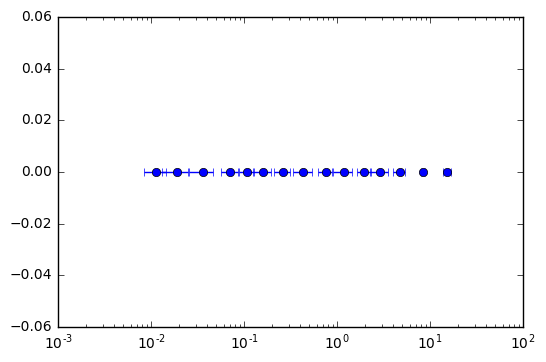

In [255]:
plt.errorbar(ligav,ligav*0,xerr=ligstd,marker='o',linestyle='none')
plt.xscale('log')

In [256]:
[np.where(np.isnan(i)==False) for i in a]

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13]),),
 (array([ 0,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14]),),
 (array([ 1,  2,  3,  5,  6,  7,  9, 10, 11, 12, 13, 14]),),
 (array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 0,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 0,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14]),),
 (array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12, 13, 14]),),
 (array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 13, 14]),),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14]),),
 (array([ 0, 

In [257]:
for i in keyed_ligs:
    print(i.size)

15
13
13
13
12
15
14
15
15
14
14
15
13
14
15
14
15


In [269]:
def init_nanarr(shape):
    nanarr = np.empty(shape)
    nanarr[:] = np.NAN
    return nanarr

def aligner_mod2(arr_long,arr_short,aligned_arr):
    indices = [] 
    for i in range(arr_short.shape[0]):
        x = np.abs(arr_long - arr_short[i])
        indices.append(np.argmin(x))
        
    for i in range(len(indices)):
        aligned_arr[indices[i]] = arr_short[i]
        
    return aligned_arr
    
#this needs to be cleaned up and made explicit that long array goes into slot 1
def aligner_wrap(arr1, arr2):
    if arr1.shape > arr2.shape:
        arr_long = arr1
        arr_short = arr2
        aligned_arr = init_nanarr(arr1.shape)
        return aligner_mod2(arr_long,arr_short,aligned_arr)
    elif arr1.shape < arr2.shape:
        arr_long = arr2
        arr_short = arr1
        aligned_arr = init_nanarr(arr2.shape)
        return aligner_mod2(arr_long,arr_short,aligned_arr)
    else:
        return arr2   
    
def align_datset_mod2(datset):
    '''takes a numpy array of numpy arrays and aligns all arrays to to the first
    largest array it finds in the super array'''
    lng_idx = np.argmax([i.size for i in datset]) #index for first-found longest array
    
    oth_idxs = list(range(len([i.size for i in datset]))) #list of indices
    oth_idxs.remove(lng_idx) #remove index for long array
    
    #print(lng_idx,oth_idxs) PASSED
    
    container = [aligner_wrap(datset[lng_idx],datset[i]) for i in oth_idxs] #call aligner func
    container.insert(0,datset[lng_idx])
    
    return np.array(container)

In [259]:
aligner_wrap(keyed_ligs[0],keyed_ligs[1])

array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,         nan,
        1.831155  ,  2.570049  ,  5.068029  ,  8.196809  ,         nan])

In [260]:
keyed_ligs[1]

array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,  1.831155  ,
        2.570049  ,  5.068029  ,  8.196809  ])

In [261]:
aligner_wrap(keyed_ligs[0],keyed_ligs[5])

array([  7.67501400e-03,   1.49975000e-02,   2.95726500e-02,
         6.11212100e-02,   9.69908500e-02,   1.44087100e-01,
         2.48778100e-01,   3.94624700e-01,   6.87951000e-01,
         1.17700400e+00,   1.83259900e+00,   2.57264700e+00,
         4.08259800e+00,   8.05087400e+00,   1.60190700e+01])

In [262]:
keyed_ligs[5]

array([  7.67501400e-03,   1.49975000e-02,   2.95726500e-02,
         6.11212100e-02,   9.69908500e-02,   1.44087100e-01,
         2.48778100e-01,   3.94624700e-01,   6.87951000e-01,
         1.17700400e+00,   1.83259900e+00,   2.57264700e+00,
         4.08259800e+00,   8.05087400e+00,   1.60190700e+01])

In [263]:
aligner_wrap(keyed_ligs[1],keyed_ligs[0])

array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,         nan,
        1.831155  ,  2.570049  ,  5.068029  ,  8.196809  ,         nan])

In [270]:
a2 = align_datset_mod2(keyed_ligs)

In [271]:
a2.shape

(17, 15)

In [281]:
mask = [np.where(np.isnan(i)==False) for i in a2]

In [276]:
ligavg2 = np.nanmean(a2,axis=0)

In [277]:
ligstd2 = np.nanstd(a2, axis=0)

In [278]:
ligavg2

array([  1.06735054e-02,   1.96383271e-02,   3.66693065e-02,
         6.76526018e-02,   1.11616821e-01,   1.63748050e-01,
         2.68920665e-01,   4.49063388e-01,   7.50899013e-01,
         1.19058412e+00,   1.90309181e+00,   2.85982506e+00,
         4.94010012e+00,   8.41027865e+00,   1.39579933e+01])

In [279]:
ligstd2/ligavg2

array([ 0.21836036,  0.29663446,  0.31129923,  0.15785425,  0.20350941,
        0.24470393,  0.21892055,  0.26461707,  0.156729  ,  0.21699082,
        0.1512908 ,  0.20798686,  0.1828594 ,  0.05856747,  0.11735871])

In [286]:
for i in mask:
    print(mask[i][0])

TypeError: list indices must be integers or slices, not tuple

In [301]:
for i in range(len(mask)):
    print(ligavg2[mask[i][0].tolist()])

[  1.06735054e-02   1.96383271e-02   3.66693065e-02   6.76526018e-02
   1.11616821e-01   1.63748050e-01   2.68920665e-01   4.49063388e-01
   7.50899013e-01   1.19058412e+00   1.90309181e+00   2.85982506e+00
   4.94010012e+00   8.41027865e+00   1.39579933e+01]
[ 0.01067351  0.01963833  0.03666931  0.0676526   0.11161682  0.16374805
  0.26892066  0.44906339  0.75089901  1.90309181  2.85982506  4.94010012
  8.41027865]
[  1.06735054e-02   3.66693065e-02   6.76526018e-02   1.63748050e-01
   2.68920665e-01   4.49063388e-01   7.50899013e-01   1.19058412e+00
   2.85982506e+00   4.94010012e+00   8.41027865e+00   1.39579933e+01]
[  0.01963833   0.03666931   0.0676526    0.16374805   0.26892066
   0.44906339   1.19058412   1.90309181   2.85982506   4.94010012
   8.41027865  13.95799333]
[ 0.03666931  0.0676526   0.11161682  0.16374805  0.26892066  0.44906339
  0.75089901  1.19058412  1.90309181  2.85982506  4.94010012  8.41027865]
[  1.06735054e-02   1.96383271e-02   3.66693065e-02   6.76526018e

In [297]:
len(mask)

17

In [304]:
adj_lig = np.array([ligavg2[mask[i][0].tolist()] for i in range(len(mask))])

(17,)

In [306]:
len(adj_lig)

17

ValueError: x and y must have same first dimension

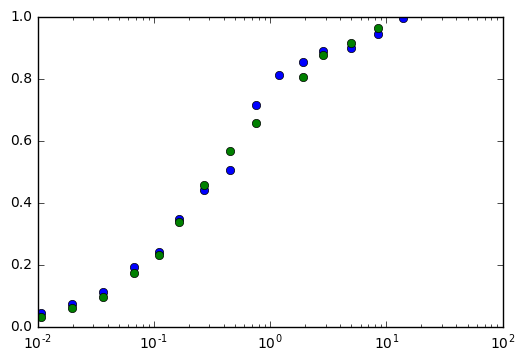

In [307]:
for i in range(len(adj_lig)):
    plt.semilogx(adj_lig[i],keyed_sats[i],'o')

In [308]:
keyed_sats

array([ array([ 0.04603855,  0.07301927,  0.1115632 ,  0.1925054 ,  0.2426124 ,
        0.3466809 ,  0.4411135 ,  0.5066381 ,  0.7147752 ,  0.8130621 ,
        0.8535332 ,  0.8901499 ,  0.8997859 ,  0.9460385 ,  0.9961456 ]),
       array([ 0.03062099,  0.05952891,  0.09614561,  0.1732334 ,  0.2310493 ,
        0.337045  ,  0.4565311 ,  0.5683084 ,  0.6588865 ,  0.8053533 ,
        0.8766595 ,  0.9171307 ,  0.9633833 ]),
       array([ 0.04411135,  0.1038544 ,  0.1443255 ,  0.3158458 ,  0.4507495 ,
        0.5528908 ,  0.6685225 ,  0.7957174 ,  0.8689507 ,  0.9132763 ,
        0.9094219 ,  0.9730192 ,  0.9710921 ]),
       array([ 0.07301927,  0.1115632 ,  0.1578158 ,  0.3023555 ,  0.4141328 ,
        0.5278373 ,  0.6087794 ,  0.7494647 ,  0.8554604 ,  0.8381156 ,
        0.9113491 ,  0.9576017 ,  0.9441114 ]),
       array([ 0.09421842,  0.1501071 ,  0.1963597 ,  0.2869379 ,  0.3871521 ,
        0.466167  ,  0.5875803 ,  0.6955032 ,  0.7571734 ,  0.7995718 ,
        0.9229122 ,  0.924

In [309]:
for i in keyed_ligs:
    print(i.shape)

(15,)
(13,)
(13,)
(13,)
(12,)
(15,)
(14,)
(15,)
(15,)
(14,)
(14,)
(15,)
(13,)
(14,)
(15,)
(14,)
(15,)


In [310]:
for i in adj_lig:
    print(i.shape)

(15,)
(13,)
(12,)
(12,)
(12,)
(15,)
(13,)
(15,)
(15,)
(13,)
(14,)
(15,)
(12,)
(13,)
(15,)
(12,)
(15,)


In [324]:
def init_nanarr(shape):
    nanarr = np.empty(shape)
    nanarr[:] = np.NAN
    return nanarr

def aligner(arr_long,arr_short):
    aligned_arr = init_nanarr(arr_long.shape)
    indices = [] 
    for i in range(len(arr_short)):
        x = np.abs(arr_long - arr_short[i])
        indices.append(np.argmin(x))
        
    for i in range(len(indices)):
        aligned_arr[indices[i]] = arr_short[i]
        
    return aligned_arr
    
#this needs to be cleaned up and made explicit that long array goes into slot 1
def aligner_wrap(arr1, arr2):
    """arr1 is array of largest size in set"""
    if arr1.shape == arr2.shape:
        return arr2
    else:
        return aligner(arr1,arr2)
    
def align_datset(datset):
    '''takes a numpy array of numpy arrays and aligns all arrays to to the first
    largest array it finds in the super array'''
    lng_idx = np.argmax([i.size for i in datset]) #index for first-found longest array
    
    oth_idxs = list(range(len([i.size for i in datset]))) #list of indices
    oth_idxs.remove(lng_idx) #remove index for long array
    
    #print(lng_idx,oth_idxs) PASSED
    
    container = [aligner_wrap(datset[lng_idx],datset[i]) for i in oth_idxs] #call aligner func
    container.insert(0,datset[lng_idx])
    
    return np.array(container)

In [327]:
aligned_ligs = align_datset(keyed_ligs)

In [321]:
aligner(keyed_ligs[0],keyed_ligs[1])

array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,         nan,
        1.831155  ,  2.570049  ,  5.068029  ,  8.196809  ,         nan])

In [323]:
len(keyed_ligs[1])

13

(17, 15)

In [329]:
mask = [np.where(np.isnan(i)==False) for i in aligned_ligs]

In [334]:
for i in mask:
    print(i[0].size)

15
13
12
12
12
15
13
15
15
13
14
15
12
13
15
12
15


In [335]:
for i in keyed_ligs:
    print(i.size)

15
13
13
13
12
15
14
15
15
14
14
15
13
14
15
14
15


In [338]:
aligner(keyed_ligs[0],keyed_ligs[2])

array([  1.04782800e-02,              nan,   4.39510000e-02,
         6.71754600e-02,              nan,   1.59764000e-01,
         2.75784200e-01,   4.67317900e-01,   8.37884700e-01,
         1.34129100e+00,              nan,   3.22207200e+00,
         5.06843800e+00,   9.99232400e+00,   1.63226300e+01])

In [339]:
keyed_ligs[0].size

15

In [340]:
keyed_ligs[2].size

13

In [342]:
len(keyed_ligs[2])

13

In [344]:
keyed_ligs[2][12]

16.32263

In [347]:
for i in range(len(keyed_ligs[2])):
    print(np.abs(keyed_ligs[0] - keyed_ligs[2][i]))

[  2.50882300e-03   4.51498000e-03   2.05169100e-02   5.06170000e-02
   8.46703300e-02   1.33486520e-01   2.33490720e-01   3.84026820e-01
   6.76444720e-01   1.06892072e+00   1.83710472e+00   2.60816672e+00
   4.18663672e+00   8.11081972e+00   1.60027617e+01]
[  3.59815430e-02   2.89577400e-02   1.29558100e-02   1.71442800e-02
   5.11976100e-02   1.00013800e-01   2.00018000e-01   3.50554100e-01
   6.42972000e-01   1.03544800e+00   1.80363200e+00   2.57469400e+00
   4.15316400e+00   8.07734700e+00   1.59692890e+01]
[  5.92060030e-02   5.21822000e-02   3.61802700e-02   6.08018000e-03
   2.79731500e-02   7.67893400e-02   1.76793540e-01   3.27329640e-01
   6.19747540e-01   1.01222354e+00   1.78040754e+00   2.55146954e+00
   4.12993954e+00   8.05412254e+00   1.59460645e+01]
[  1.51794543e-01   1.44770740e-01   1.28768810e-01   9.86687200e-02
   6.46153900e-02   1.57992000e-02   8.42050000e-02   2.34741100e-01
   5.27159000e-01   9.19635000e-01   1.68781900e+00   2.45888100e+00
   4.03735100

In [449]:
def shifter(ser,target):
    '''takes monotonic increasing sequence with repeat values and up/down shifts 
    so that all values are unique'''
    max = target.size
    for i in range(len(ser)-1):
        if ser[i+1] == ser[i]:
            if (ser[i] - ser[i-1]) > 1:
                ser[i] = (ser[i]-1)
            else:
                ser[i+1] = (ser[i+1]+1)
        else:
            pass
    return ser

#new aligner to prevent index overwrites
def aligner(arr_long,arr_short):
    aligned_arr = init_nanarr(arr_long.shape)
    indices = [] 
    for i in range(len(arr_short)):
        x = np.abs(arr_long - arr_short[i])
        #print(np.argmin(x))
        indices.append(np.argmin(x))
        
    shifter(indices)
    print(indices)
        
    for i in range(len(indices)):
        aligned_arr[indices[i]] = arr_short[i]
        
    print(aligned_arr)  
    return aligned_arr

In [453]:
inds = aligner(keyed_ligs[0],keyed_ligs[5])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[  7.67501400e-03   1.49975000e-02   2.95726500e-02   6.11212100e-02
   9.69908500e-02   1.44087100e-01   2.48778100e-01   3.94624700e-01
   6.87951000e-01   1.17700400e+00   1.83259900e+00   2.57264700e+00
   4.08259800e+00   8.05087400e+00   1.60190700e+01]


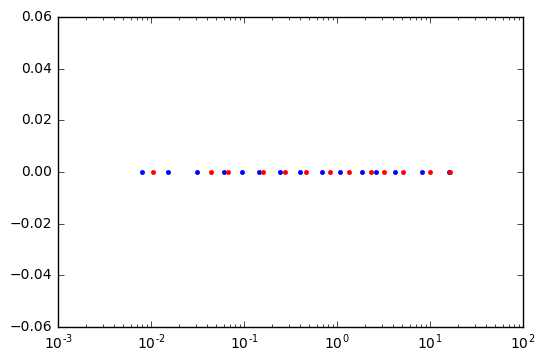

In [355]:
plt.semilogx(keyed_ligs[0], 0*keyed_ligs[0],'.')
plt.semilogx(keyed_ligs[2], 0*keyed_ligs[2],'.', color='red')

In [362]:
j = [1,2,4,5,6]

In [363]:
3 in j

False

In [364]:
if (3 in j):
    print('hi')
else:
    print('dee')

dee


In [378]:
inds

[0, 2, 3, 5, 6, 7, 8, 9, 11, 11, 12, 13, 14]

In [381]:
for i in range(len(inds)-1):
    if inds[i+1] ==  inds[i]:
        if inds[i] - inds[i-1] > 1:
            inds[i] = (inds[i] - 1)
        else:
            print('drb')

In [382]:
inds

[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [383]:
testser = [1,2,3,5,5,7,8]

In [400]:
def shifter(ser):
    for i in range(len(ser)-1):
        if ser[i+1] == ser[i]:
            if ser[i] - ser[i-1] > 1:
                ser[i] = (ser[i] -1)
            else:
                ser[i+1] = (ser[i+1] + 1) 
            return ser
        else:
            return ser               

In [401]:
testser = [1,2,3,4,5,5,6,7,8]

In [414]:
testser = [1,2,3,5,5,7,8]

In [403]:
shifter(testser)

[1, 2, 3, 5, 5, 7, 8]

In [415]:
ser = testser

In [417]:
for i in range(len(ser)-1):
    if ser[i+1] == ser[i]:
        if ser[i] - ser[i-1] > 1:
            ser[i] = (ser[i] -1)
        else:
            ser[i+1] = (ser[i+1] + 1)

In [418]:
ser

[1, 2, 3, 4, 5, 7, 8]

In [437]:
inds

array([  1.04782800e-02,              nan,   4.39510000e-02,
         6.71754600e-02,              nan,   1.59764000e-01,
         2.75784200e-01,   4.67317900e-01,   8.37884700e-01,
         1.34129100e+00,   2.29507100e+00,   3.22207200e+00,
         5.06843800e+00,   9.99232400e+00,   1.63226300e+01])

In [438]:
old_aligner = aligner(keyed_ligs[0],keyed_ligs[2])

In [439]:
old_aligner

array([  1.04782800e-02,              nan,   4.39510000e-02,
         6.71754600e-02,              nan,   1.59764000e-01,
         2.75784200e-01,   4.67317900e-01,   8.37884700e-01,
         1.34129100e+00,              nan,   3.22207200e+00,
         5.06843800e+00,   9.99232400e+00,   1.63226300e+01])

In [440]:
new_aligner = aligner_test(keyed_ligs[0],keyed_ligs[2])

[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[  1.04782800e-02              nan   4.39510000e-02   6.71754600e-02
              nan   1.59764000e-01   2.75784200e-01   4.67317900e-01
   8.37884700e-01   1.34129100e+00   2.29507100e+00   3.22207200e+00
   5.06843800e+00   9.99232400e+00   1.63226300e+01]


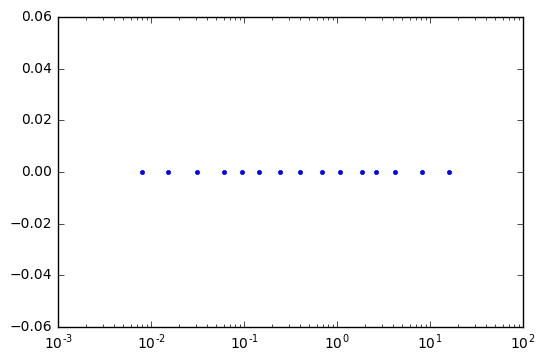

In [447]:
plt.semilogx(keyed_ligs[0], keyed_ligs[0]*0,'.')

In [455]:
for i in keyed_ligs:
    print(i.size)

15
13
13
13
12
15
14
15
15
14
14
15
13
14
15
14
15


In [459]:
aligner_test(keyed_ligs[0],keyed_ligs[6])

[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


IndexError: index 15 is out of bounds for axis 0 with size 15

In [465]:
keyed_ligs[6]

array([  0.01713749,   0.03444448,   0.07655431,   0.1450889 ,
         0.251269  ,   0.4142728 ,   0.7255647 ,   1.060153  ,
         1.819164  ,   2.552526  ,   4.121284  ,   6.136859  ,
         8.368795  ,  12.34485   ])

In [532]:
def shifter(ser):
    '''takes monotonic increasing sequence with repeat values and up/down shifts 
    so that all values are unique'''
    for i in range(len(ser)-1):
        if ser[i+1] == ser[i]:
            if (ser[i] - ser[i-1]) > 1:
                ser[i] = (ser[i]-1)
            else:
                ser[i+1] = (ser[i+1]+1)
        else:
            pass
    
    if ser[-1] > len(ser):
        for i in range(len(ser)-1):
            if (ser[i+1] - ser[i]) > 1:
                ser[i+1] = ser[i+1]-1
            else:
                pass
    else:
        pass
    return ser

#even newer aligner to prevent index overwrites
def aligner(arr_long,arr_short):
    aligned_arr = init_nanarr(arr_long.shape)
    indices = [] 
    for i in range(len(arr_short)):
        x = np.abs(arr_long - arr_short[i])
        #print(np.argmin(x))
        indices.append(np.argmin(x)) #the slot in the large array should end up in
        
    shifter(indices)
    #print(arr_short)
    #print(indices)
    #print('Length of indices array: ',len(indices))
    #print('Length of short array: ', len(arr_short))
        
    for i in range(len(indices)): #this is problem
        aligned_arr[indices[i]] = arr_short[i]
        
    #print(aligned_arr)  
    return aligned_arr

In [533]:
aligner(keyed_ligs[0],keyed_ligs[6])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


array([         nan,   0.01713749,   0.03444448,   0.07655431,
         0.1450889 ,   0.251269  ,   0.4142728 ,   0.7255647 ,
         1.060153  ,   1.819164  ,   2.552526  ,   4.121284  ,
         6.136859  ,   8.368795  ,  12.34485   ])

In [534]:
keyed_ligs[0]

array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01])

In [520]:
keyed_ligs[0][15]

IndexError: index 15 is out of bounds for axis 0 with size 15

In [525]:
a = [1,2,3,4]

In [526]:
a[-1]

4

In [527]:
len(a)

4

In [528]:
a[4]

IndexError: list index out of range